## Описание данных

Этот набор данных создан для создания прогнозной модели трансферной стоимости футболистов. Мы будем использовать данные футболистов и построим модель для прогнозирования трансферных сборов на основе этих данных. Данные об игроках включают в себя основную информацию, такую как возраст, рост, игровая позиция, а также профессиональную статистику, такую как забитые голы, результативные передачи (в сезонах 2021–2022 и 2022–2023 годов), травмы, а также общее количество индивидуальных и командных наград за карьеру.

Мы собрали информацию об игроках, выступающих в нескольких ведущих мировых футбольных лигах:

11 европейских лиг, включая Премьер-лигу и чемпионат Англии, Бундеслигу в Германии, Ла Лигу в Испании, Серию А в Италии, Лигу 1 во Франции, Эредивизи в Нидерландах, Лигу НОС в Португалии, Премьер-лигу в России, Суперлигу в Турция и Бундеслига в Австрии.

4 американские лиги, включая Бразилию в Бразилии, Высшую футбольную лигу в США, Примеру Дивизиона в Аргентине и Лигу MX в Мексике.

Первая африканская лига, а именно Премьер-лига DSTV в Южной Африке.

In [43]:
## импортируем все необходимые библиотеки 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns                                                      
import numpy as np 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import ensemble
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score 
plt.style.use('dark_background')

In [2]:
df = pd.read_csv('C:\\Users\\user\\Downloads\\footbal transfers\\final_data.csv')

In [4]:
df.head()

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.000000,0.000000,0.009585,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.000000,0.000000,0.069018,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,/tom-heaton/profil/spieler/34130,Manchester United,Tom Heaton,Goalkeeper,188.0,37.0,4,0.000000,0.000000,0.000000,...,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
3,/lisandro-martinez/profil/spieler/480762,Manchester United,Lisandro Martínez,Defender Centre-Back,175.0,25.0,82,0.028090,0.056180,0.224719,...,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0
4,/raphael-varane/profil/spieler/164770,Manchester United,Raphaël Varane,Defender Centre-Back,191.0,30.0,63,0.017889,0.017889,0.053667,...,0.000000,0.000000,5031,238,51,21,40000000,80000000,2,0


In [5]:
df.tail() 

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
10749,/aidan-simmons/profil/spieler/867763,Western Sydney Wanderers,Aidan Simmons,Attack-RightWinger,181.240353,20.0,16,0.175953,0.087977,0.263930,...,0.0,0.0,1023,0,0,0,75000,75000,4,1
10750,/kusini-yengi/profil/spieler/708099,Western Sydney Wanderers,Kusini Yengi,Attack Centre-Forward,190.000000,24.0,26,0.372671,0.186335,0.186335,...,0.0,0.0,1449,102,18,0,300000,300000,4,0
10751,/nathanael-blair/profil/spieler/1023268,Western Sydney Wanderers,Nathanael Blair,Attack Centre-Forward,181.240353,19.0,20,0.375000,0.000000,0.187500,...,0.0,0.0,960,0,0,0,50000,50000,4,0
10752,/zachary-sapsford/profil/spieler/703657,Western Sydney Wanderers,Zachary Sapsford,Attack Centre-Forward,181.240353,20.0,17,0.312139,0.104046,0.000000,...,0.0,0.0,865,0,0,0,50000,50000,4,0
10753,/alexander-badolato/profil/spieler/957230,Western Sydney Wanderers,Alexander Badolato,Attack Centre-Forward,170.000000,18.0,21,0.000000,0.000000,0.086042,...,0.0,0.0,1046,0,0,0,25000,25000,4,0


In [6]:
df.shape

(10754, 22)

In [7]:
df.dtypes

player                  object
team                    object
name                    object
position                object
height                 float64
age                    float64
appearance               int64
goals                  float64
assists                float64
yellow cards           float64
second yellow cards    float64
red cards              float64
goals conceded         float64
clean sheets           float64
minutes played           int64
days_injured             int64
games_injured            int64
award                    int64
current_value            int64
highest_value            int64
position_encoded         int64
winger                   int64
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10754 entries, 0 to 10753
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   player               10754 non-null  object 
 1   team                 10754 non-null  object 
 2   name                 10754 non-null  object 
 3   position             10754 non-null  object 
 4   height               10754 non-null  float64
 5   age                  10754 non-null  float64
 6   appearance           10754 non-null  int64  
 7   goals                10754 non-null  float64
 8   assists              10754 non-null  float64
 9   yellow cards         10754 non-null  float64
 10  second yellow cards  10754 non-null  float64
 11  red cards            10754 non-null  float64
 12  goals conceded       10754 non-null  float64
 13  clean sheets         10754 non-null  float64
 14  minutes played       10754 non-null  int64  
 15  days_injured         10754 non-null 

In [9]:
df.columns = df.columns.str.lower().str.replace(' ','_')

In [10]:
df.columns

Index(['player', 'team', 'name', 'position', 'height', 'age', 'appearance',
       'goals', 'assists', 'yellow_cards', 'second_yellow_cards', 'red_cards',
       'goals_conceded', 'clean_sheets', 'minutes_played', 'days_injured',
       'games_injured', 'award', 'current_value', 'highest_value',
       'position_encoded', 'winger'],
      dtype='object')

In [11]:
df.isna().mean()

player                 0.0
team                   0.0
name                   0.0
position               0.0
height                 0.0
age                    0.0
appearance             0.0
goals                  0.0
assists                0.0
yellow_cards           0.0
second_yellow_cards    0.0
red_cards              0.0
goals_conceded         0.0
clean_sheets           0.0
minutes_played         0.0
days_injured           0.0
games_injured          0.0
award                  0.0
current_value          0.0
highest_value          0.0
position_encoded       0.0
winger                 0.0
dtype: float64

In [12]:
df.duplicated().sum()

0

In [13]:
df['player'].agg(['count','nunique'])


count      10754
nunique    10754
Name: player, dtype: int64

In [14]:
df['team'].agg(['count','nunique'])

count      10754
nunique      374
Name: team, dtype: int64

In [15]:
df['name'].agg(['count','nunique'])

count      10754
nunique    10584
Name: name, dtype: int64

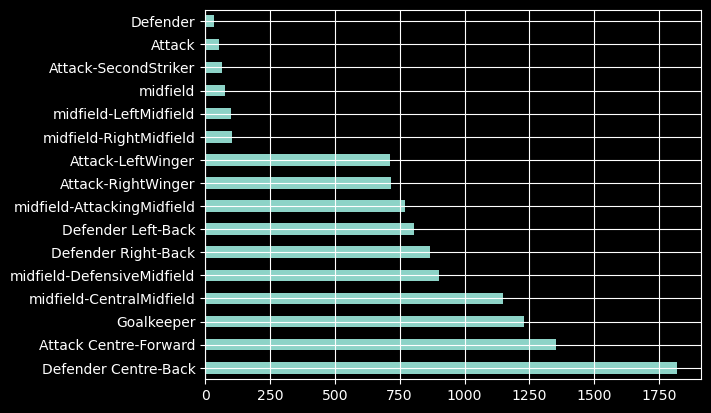

In [16]:
df['position'].value_counts().plot(kind='barh', grid = True)
plt.show()

<Axes: >

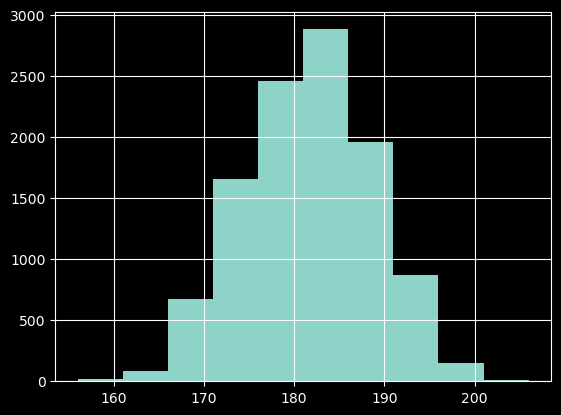

In [17]:
df['height'].hist()

In [18]:
df['height'].describe()

count    10754.000000
mean       181.240353
std          6.969818
min        156.000000
25%        176.000000
50%        181.240353
75%        186.000000
max        206.000000
Name: height, dtype: float64

Средний рост игроков составил 181 см.

<Axes: >

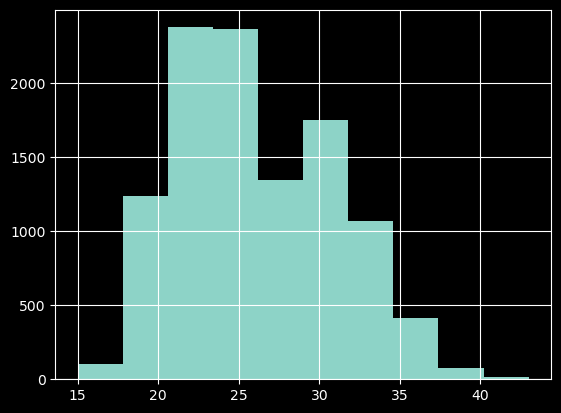

In [19]:
df['age'].hist()

In [20]:
df['age'].describe()

count    10754.000000
mean        26.041903
std          4.777629
min         15.000000
25%         22.000000
50%         26.000000
75%         29.000000
max         43.000000
Name: age, dtype: float64

Средний возраст игроков составил 26 лет

<Axes: >

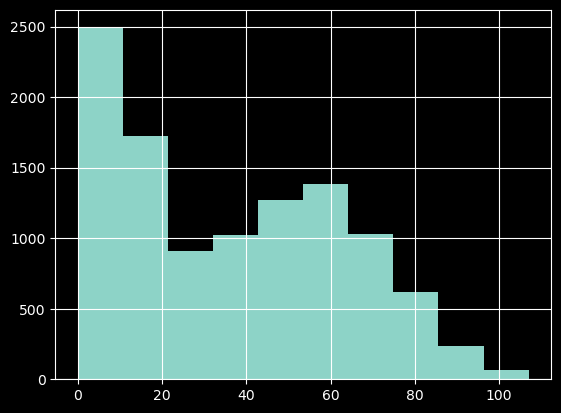

In [21]:
df['appearance'].hist()

In [22]:
df['appearance'].describe()

count    10754.000000
mean        36.407011
std         26.526541
min          0.000000
25%         12.000000
50%         35.000000
75%         59.000000
max        107.000000
Name: appearance, dtype: float64

In [23]:
df['goals'].mean()

0.12555431571759346

In [24]:
df['assists'].describe()

count    10754.000000
mean         0.086978
std          0.143351
min          0.000000
25%          0.000000
50%          0.040773
75%          0.133136
max          4.000000
Name: assists, dtype: float64

<Axes: >

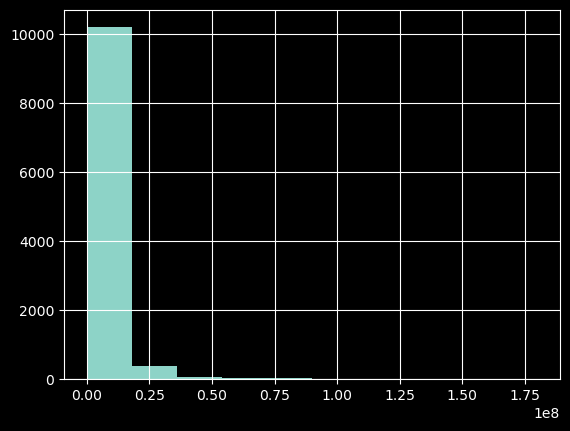

In [25]:
df['current_value'].hist()

In [30]:
df['yellow_cards'].agg(['count','nunique'])

count      10754
nunique     6291
Name: yellow_cards, dtype: int64

In [31]:
df['second_yellow_cards'].agg(['count','nunique'])

count      10754
nunique     1095
Name: second_yellow_cards, dtype: int64

In [32]:
df['red_cards'].agg(['count','nunique'])

count      10754
nunique     1219
Name: red_cards, dtype: int64

<Axes: >

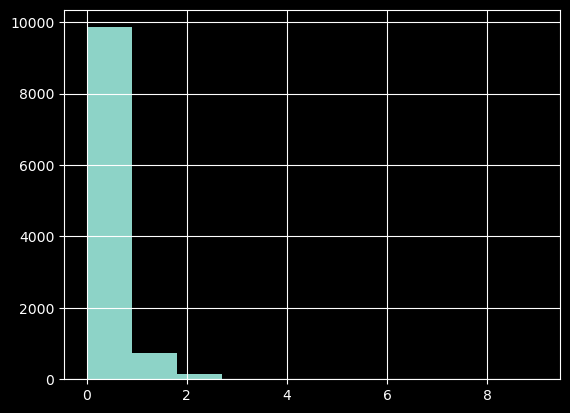

In [34]:
df['goals_conceded'].hist()

In [35]:
df['goals_conceded'].describe()

count    10754.000000
mean         0.131655
std          0.442335
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          9.000000
Name: goals_conceded, dtype: float64

In [73]:
df['clean_sheets'].agg(['count','mean','median'])

count     10754.000000
mean          0.044881
median        0.000000
Name: clean_sheets, dtype: float64

In [74]:
df['minutes_played'].agg(['count','mean','median'])

count     10754.000000
mean       2470.789381
median     2101.500000
Name: minutes_played, dtype: float64

In [75]:
df['days_injured'].agg(['count','mean','median'])

count     10754.000000
mean        117.961689
median       37.000000
Name: days_injured, dtype: float64

In [76]:
df['games_injured'].agg(['count','mean','median'])

count     10754.000000
mean         15.826297
median        5.000000
Name: games_injured, dtype: float64

In [79]:
df['award'].value_counts(normalize=True).round(2)

0     0.44
1     0.21
2     0.11
3     0.07
4     0.04
5     0.03
6     0.02
7     0.02
8     0.01
9     0.01
10    0.01
11    0.01
13    0.00
12    0.00
14    0.00
15    0.00
17    0.00
18    0.00
16    0.00
19    0.00
20    0.00
33    0.00
22    0.00
21    0.00
25    0.00
24    0.00
26    0.00
23    0.00
35    0.00
36    0.00
29    0.00
27    0.00
32    0.00
37    0.00
31    0.00
42    0.00
28    0.00
92    0.00
34    0.00
30    0.00
57    0.00
65    0.00
53    0.00
38    0.00
43    0.00
90    0.00
Name: award, dtype: float64

In [83]:
df['winger'].value_counts()

0    7447
1    3307
Name: winger, dtype: int64

7447 игроков не являются 'вингерами', 3307 игрока являются вингерами.

In [86]:
df['position_encoded'].value_counts(normalize=True).round(2)

6     0.17
1     0.13
9     0.11
12    0.11
13    0.08
8     0.08
7     0.08
11    0.07
3     0.07
2     0.07
15    0.01
14    0.01
10    0.01
4     0.01
0     0.00
5     0.00
Name: position_encoded, dtype: float64

In [89]:
df['current_value'].describe()

count    1.075400e+04
mean     3.622971e+06
std      9.095410e+06
min      0.000000e+00
25%      3.000000e+05
50%      8.000000e+05
75%      3.000000e+06
max      1.800000e+08
Name: current_value, dtype: float64

In [90]:
df['highest_value'].describe()

count    1.075400e+04
mean     6.152606e+06
std      1.338988e+07
min      0.000000e+00
25%      4.500000e+05
50%      1.500000e+06
75%      5.000000e+06
max      2.000000e+08
Name: highest_value, dtype: float64

# Machine learning 

In [45]:
# создаем обучающую и тестовую выборки 

le = LabelEncoder() 
encoders = {}
text_features = ['team','position']

for feature in text_features: 
    encoders[feature] = le 
    df[feature+ "_encoded"] = encoders[feature].fit_transform(df[feature])

In [46]:
# выбираем признаки 
features = ['highest_value', 'appearance', 'minutes_played', 'award','assists', 'goals', 'position_encoded','team_encoded'] 



In [47]:
# выбираем таргет 
X = df[features] 
y = df['current_value']

In [48]:
# делим на обучающую и тестовую выборки 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.15, random_state = 0)

In [50]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [54]:
params = {'n_estimators':510, 'max_depth':4, 'min_samples_split':2,'learning_rate': 0.01, 'loss':'squared_error'} 
regressor = ensemble.GradientBoostingRegressor(** params) 

regressor.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.01, max_depth=4, n_estimators=510)

In [57]:
y_pred = regressor.predict(X_test)

In [59]:
## считаем r2_score
r2 = r2_score(y_test, y_pred)
print(r2) 

0.7559137727972487
